Epoch 1/100
25/25 [==============================] - 1s 16ms/step - loss: 0.5878 - task1_output_loss: 0.2544 - task2_output_loss: 0.3334 - task1_output_mae: 0.4192 - task2_output_mae: 0.4817 - val_loss: 0.2006 - val_task1_output_loss: 0.1066 - val_task2_output_loss: 0.0940 - val_task1_output_mae: 0.2697 - val_task2_output_mae: 0.2534
Epoch 2/100
25/25 [==============================] - 0s 6ms/step - loss: 0.2009 - task1_output_loss: 0.1000 - task2_output_loss: 0.1009 - task1_output_mae: 0.2648 - task2_output_mae: 0.2651 - val_loss: 0.1729 - val_task1_output_loss: 0.0943 - val_task2_output_loss: 0.0787 - val_task1_output_mae: 0.2565 - val_task2_output_mae: 0.2367
Epoch 3/100
25/25 [==============================] - 0s 6ms/step - loss: 0.1850 - task1_output_loss: 0.0928 - task2_output_loss: 0.0922 - task1_output_mae: 0.2580 - task2_output_mae: 0.2567 - val_loss: 0.1625 - val_task1_output_loss: 0.0878 - val_task2_output_loss: 0.0747 - val_task1_output_mae: 0.2502 - val_task2_output_mae: 0

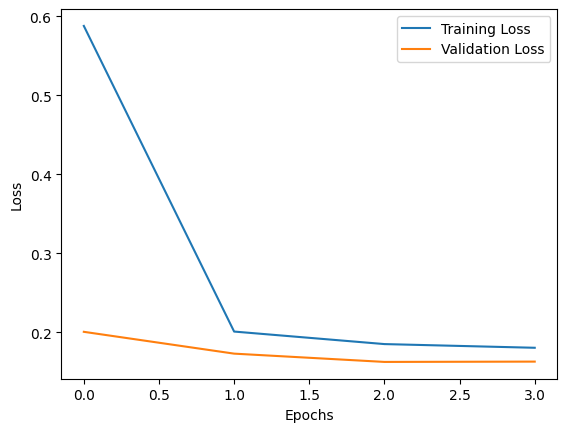

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

input_data = np.random.rand(1000, 10)
output_task1 = np.random.rand(1000, 1)
output_task2 = np.random.rand(1000, 1)

input_layer = Input(shape=(input_data.shape[1],))

shared_layer1 = Dense(64, activation='relu')(input_layer)
shared_layer2 = Dense(32, activation='relu')(shared_layer1)

task1_output = Dense(1, name='task1_output')(shared_layer2)
task2_output = Dense(1, name='task2_output')(shared_layer2)

model = Model(inputs=input_layer, outputs=[task1_output, task2_output])

model.compile(optimizer='adam',
              loss={'task1_output': 'mse', 'task2_output': 'mse'},
              metrics={'task1_output': 'mae', 'task2_output': 'mae'})

history = model.fit(input_data, {'task1_output': output_task1, 'task2_output': output_task2}, validation_split=0.2, epochs=100, callbacks=[EarlyStopping()])

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()